# Worksheet 3


## Imports and Images loading


In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.filters import threshold_otsu
from skimage import color

In [15]:
# Directory containing data and images
im_org = io.imread("./data/vertebra.png")
#shape is 2D cuz its a grayscale image
print(im_org.shape)

(998, 800)


## Conversions

- Convert from unsigned byte to float images
- Convert from float to unsigned byte images


In [3]:
# byte to float
im_float = img_as_float(im_org)

# float to unsigned byte
im_ubyte = img_as_ubyte(im_float)

## Histogram stretching

- Linear histogram **stretching** of a grey level image.
- Gamma mapping **stretching** of a grey level image.


In [4]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0

    img_out = (
        (img_float - min_val) * (max_desired - min_desired) / (max_val - min_val)
    ) + min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

In [5]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)

## Image tresholding

- Basic
- Otsu tresholding


In [6]:
# Basic treshold
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    return img_as_ubyte(mask)

In [13]:
# Otsu treshold
print(im_org.shape)
thres_new = threshold_otsu(im_org)
im_thres = threshold_image(im_org, thres=thres_new)

(998, 800)


## Color thresholding in the RGB color space

- Example function dtu sign


In [8]:
def detect_dtu_signs(img_in, sign):
    """
    Detects signs of a specified color in the input image.

    Parameters
    ----------
    img_in : ndarray
        Input image as an ndarray.
    sign : str
        Color of the sign to detect. Possible values: 'red', 'blue'.

    Returns
    -------
    ndarray
        Binary mask of the detected sign in the input image.

    Description
    -----------
    This function detects signs of a specified color ('red' or 'blue') in the input image.
    For 'red' signs, it segments the image based on certain red color thresholds in the
    red, green, and blue components. For 'blue' signs, it uses specific blue color
    thresholds in the RGB components to create a binary mask representing the detected sign.
    The output is a binary mask indicating the detected sign in the input image.
    """

    # Extract individual color components
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]

    # Detect 'red' signs based on specified thresholds
    if sign == "red":
        segm = (
            (r_comp > 160)
            & (r_comp < 180)
            & (g_comp > 50)
            & (g_comp < 80)
            & (b_comp > 50)
            & (b_comp < 80)
        )

    # Detect 'blue' signs based on specified thresholds
    if sign == "blue":
        segm = (
            (r_comp < 10)
            & (g_comp > 85)
            & (g_comp < 105)
            & (b_comp > 180)
            & (b_comp < 200)
        )

    return img_as_ubyte(segm)

## Color thresholding in the HSV color space

- Separate and divide in the 2 HSV channel


(998, 800)


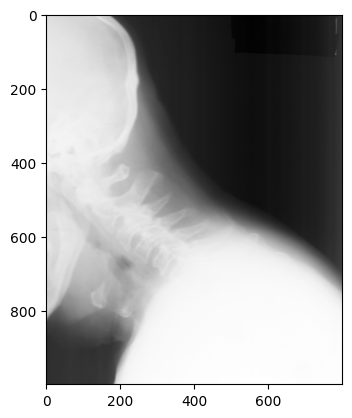

In [12]:
print(im_org.shape)

plt.imshow(im_org, cmap = "gray")
plt.show()

(998, 800, 3)


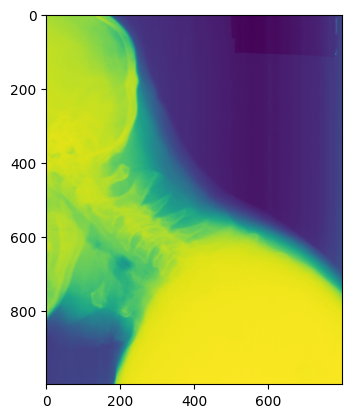

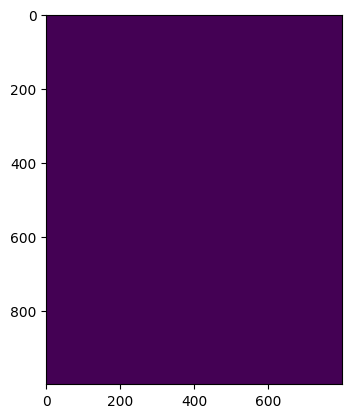

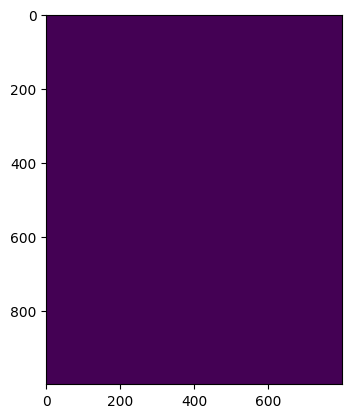

In [21]:
# Separate the different channel (HUE and VALUE channels)
rgb_image = np.stack((im_org,) * 3, axis=-1) #
hsv_img   = color.rgb2hsv(rgb_image)# Convert grayscale to pseudo-RGB format by replicating the values across three channels

print(hsv_img.shape)
hue_img   = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

# Actual segmentation
segm_blue = (hue_img < 0.6) & (hue_img > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img > 0.9)

plt.imshow(value_img)
plt.show()
plt.imshow(segm_blue)
plt.show()
plt.imshow(segm_red)
plt.show()